# Assignment 
# Ttest ind on recession bottom and quarter before recession

# Topics
1.0 Importing packages and loading data

    1.1 Exploratory Data Analysis (EDA)

2.0 Recession quarter and bottom

    2.1 Finding the quarter before recession and recession bottom

3.0 University Towns

    3.1 Extracting the university town homes

4.0 Fill the null values

    4.1 Simple Imputer- Using mean 

    4.2 Using Linear Regression
    
    4.3 Linear Regression over the town against index

    4.4 Linear Regression over the town against state data

5.0 Interpreting the results

# 1.0 Importing packages and loading data
Import all the packages and load the required zhvi_all_homes.csv data downaloaded from https://www.zillow.com/research/data/.

In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# load dataset zhvi_all_homes downloaded from https://www.zillow.com/research/data/
df_homes = pd.read_csv("zhvi_all_homes.csv")
# display the dataframe
df_homes

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,127215.0,127559.0,127921.0,128658.0,129402.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,394913,1,"New York, NY",Msa,NY,223454.0,224790.0,225991.0,228356.0,230557.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231141.0,231946.0,233179.0,235523.0,238036.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,394463,3,"Chicago, IL",Msa,IL,169006.0,169405.0,169921.0,170954.0,172049.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130305.0,130410.0,130496.0,130708.0,130930.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,753874,930,"Craig, CO",Msa,CO,95216.0,95562.0,96148.0,96843.0,97562.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,NaN,84231.0


In [3]:
df_homes1 = df_homes.copy()

# 1.1 Exploratory Data Analysis (EDA)

In [4]:
df_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Columns: 270 entries, RegionID to 2022-01-31
dtypes: float64(265), int64(2), object(3)
memory usage: 1.9+ MB


The above command doesnt print the details of the info becuase of the size crossing the limit of 1 MB.
We will be printing the details in the next few lines using size less than 1 MB.

In [5]:
df_homes.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 100 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    907 non-null    int64  
 1   SizeRank    907 non-null    int64  
 2   RegionName  907 non-null    object 
 3   RegionType  907 non-null    object 
 4   StateName   906 non-null    object 
 5   2000-01-31  443 non-null    float64
 6   2000-02-29  444 non-null    float64
 7   2000-03-31  445 non-null    float64
 8   2000-04-30  447 non-null    float64
 9   2000-05-31  449 non-null    float64
 10  2000-06-30  450 non-null    float64
 11  2000-07-31  451 non-null    float64
 12  2000-08-31  452 non-null    float64
 13  2000-09-30  453 non-null    float64
 14  2000-10-31  453 non-null    float64
 15  2000-11-30  456 non-null    float64
 16  2000-12-31  457 non-null    float64
 17  2001-01-31  465 non-null    float64
 18  2001-02-28  465 non-null    float64
 19  2001-03-31  465 non-null    

In [6]:
df_homes.iloc[:, 100:200].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 100 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2007-12-31  576 non-null    float64
 1   2008-01-31  579 non-null    float64
 2   2008-02-29  582 non-null    float64
 3   2008-03-31  587 non-null    float64
 4   2008-04-30  588 non-null    float64
 5   2008-05-31  590 non-null    float64
 6   2008-06-30  592 non-null    float64
 7   2008-07-31  594 non-null    float64
 8   2008-08-31  596 non-null    float64
 9   2008-09-30  597 non-null    float64
 10  2008-10-31  599 non-null    float64
 11  2008-11-30  601 non-null    float64
 12  2008-12-31  606 non-null    float64
 13  2009-01-31  664 non-null    float64
 14  2009-02-28  707 non-null    float64
 15  2009-03-31  748 non-null    float64
 16  2009-04-30  762 non-null    float64
 17  2009-05-31  771 non-null    float64
 18  2009-06-30  776 non-null    float64
 19  2009-07-31  782 non-null    

In [7]:
df_homes.iloc[:, 200:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2016-04-30  885 non-null    float64
 1   2016-05-31  885 non-null    float64
 2   2016-06-30  885 non-null    float64
 3   2016-07-31  885 non-null    float64
 4   2016-08-31  886 non-null    float64
 5   2016-09-30  886 non-null    float64
 6   2016-10-31  886 non-null    float64
 7   2016-11-30  886 non-null    float64
 8   2016-12-31  886 non-null    float64
 9   2017-01-31  886 non-null    float64
 10  2017-02-28  886 non-null    float64
 11  2017-03-31  886 non-null    float64
 12  2017-04-30  886 non-null    float64
 13  2017-05-31  886 non-null    float64
 14  2017-06-30  888 non-null    float64
 15  2017-07-31  888 non-null    float64
 16  2017-08-31  890 non-null    float64
 17  2017-09-30  890 non-null    float64
 18  2017-10-31  890 non-null    float64
 19  2017-11-30  891 non-null    f

In [8]:
# shape i.e. rows*columns of the dataset
df_homes.shape

(907, 270)

In [9]:
# description of dataframe of homes
df_homes.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
count,907.000000,907.000000,443.000000,444.000000,445.000000,447.000000,449.000000,450.000000,451.000000,452.00000,...,9.070000e+02,9.050000e+02,9.070000e+02,9.060000e+02,9.050000e+02,9.040000e+02,9.050000e+02,9.070000e+02,7.140000e+02,9.050000e+02
mean,415038.457552,457.616318,110915.647856,111230.565315,111467.725843,112285.445190,113113.897550,113641.702222,114342.363636,115020.55531,...,2.156086e+05,2.184145e+05,2.226890e+05,2.267074e+05,2.306208e+05,2.340699e+05,2.369074e+05,2.395203e+05,2.625226e+05,2.473383e+05
std,84177.668867,267.709849,53055.373089,53234.328939,53489.928698,54354.295519,55122.598803,55900.116167,56654.578035,57497.26550,...,1.392196e+05,1.419108e+05,1.468830e+05,1.513235e+05,1.551787e+05,1.581945e+05,1.606698e+05,1.629231e+05,1.740104e+05,1.685244e+05
min,102001.000000,0.000000,29862.000000,30029.000000,30126.000000,30257.000000,30452.000000,30552.000000,30728.000000,30717.00000,...,3.062700e+04,3.097800e+04,3.119800e+04,3.149500e+04,3.168400e+04,3.188800e+04,3.196800e+04,3.192000e+04,6.003900e+04,3.322500e+04
25%,394547.500000,226.500000,76438.500000,76871.750000,77210.000000,77479.000000,77562.000000,77874.500000,78214.500000,78534.50000,...,1.321615e+05,1.333740e+05,1.351995e+05,1.367265e+05,1.380890e+05,1.394902e+05,1.407460e+05,1.423995e+05,1.574978e+05,1.468390e+05
50%,394803.000000,454.000000,100063.000000,100025.000000,100191.000000,100491.000000,101484.000000,101565.500000,101952.000000,102474.00000,...,1.742350e+05,1.762890e+05,1.786970e+05,1.805630e+05,1.829490e+05,1.850000e+05,1.864270e+05,1.882090e+05,2.095160e+05,1.944470e+05
75%,395049.500000,685.500000,129128.000000,129243.250000,129487.000000,130099.000000,130506.000000,131028.750000,131579.000000,132136.00000,...,2.591475e+05,2.618800e+05,2.667270e+05,2.722985e+05,2.773160e+05,2.808040e+05,2.831990e+05,2.850490e+05,3.127180e+05,2.933770e+05
max,753929.000000,933.000000,437148.000000,439771.000000,443523.000000,454228.000000,464483.000000,476647.000000,486040.000000,498498.00000,...,1.352614e+06,1.391661e+06,1.439698e+06,1.477560e+06,1.498828e+06,1.505111e+06,1.514055e+06,1.528797e+06,1.549756e+06,1.578375e+06


In [10]:
# checking the null values
df_homes.isnull().sum()

RegionID        0
SizeRank        0
RegionName      0
RegionType      0
StateName       1
             ... 
2021-09-30      3
2021-10-31      2
2021-11-30      0
2021-12-31    193
2022-01-31      2
Length: 270, dtype: int64

## Price Trend across United States (Country Level)

In [11]:
# 1st row is Country level data --> ZHVI (typical home value) across United States
#RegionType = Country and RegionName = United States

df_homes[df_homes['StateName'].isnull()]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,127215.0,127559.0,127921.0,128658.0,129402.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0


1st row can be analyzed separately as it's country level data unlike other rows which are regionwise data

In [12]:
#Country level data 1st row has only 1 null value in "StateName" column
df_homes.iloc[0].describe()

count        269.0
unique       268.0
top       177942.0
freq           2.0
Name: 0, dtype: float64

Let's analyse 1st row (country level) data, home price trend separately.

Home Price across United States between years Jan 2000 to Jan 2022.

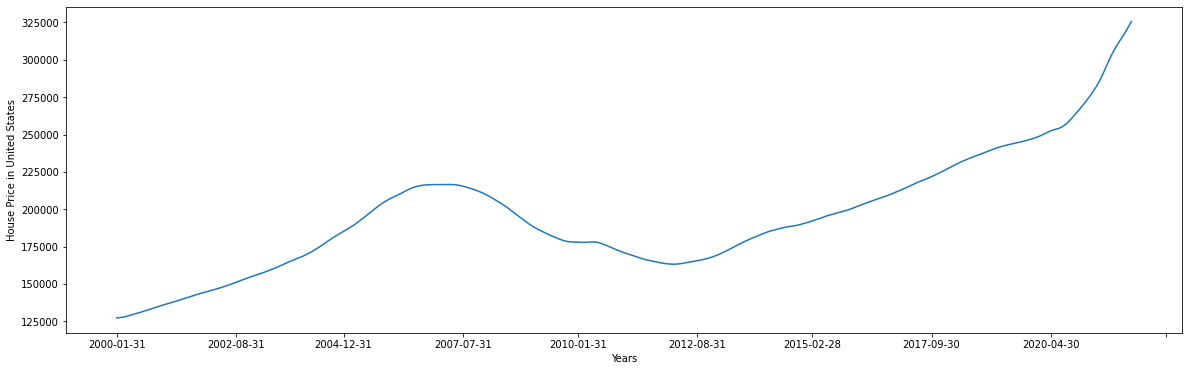

In [14]:
#mdates package provides better distribution/labelling of dates on matplotlib axes
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (20,6)

x = df_homes.columns[5:] #List of months
y = df_homes.iloc[0, 5:] #List of house prices

fig, axs = plt.subplots()


locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
axs.xaxis.set_major_locator(locator)
#axs.xaxis.set_major_formatter(formatter)

plt.plot(x,y)

plt.xlabel("Years")
plt.ylabel("House Price in United States")

plt.show()

From above graph we can infer that average home prices across United States has a increasing trend with a sharp decline in price between July 2007 and August 2012.

This decline can be attributed to Economic depression during that period

## Null Values of dataset

As we can see that there a lot of null values, we will be dealing with it later when we have reduced the df_homes to only the university_town_homes.

Below plot of hist will also be compared later after we have delat with null values

(array([[410.,  28.,   5., ...,   0.,   0.,   0.],
        [411.,  28.,   5., ...,   0.,   0.,   0.],
        [412.,  28.,   5., ...,   0.,   0.,   0.],
        ...,
        [436., 324.,  85., ...,   2.,   1.,   1.],
        [286., 281.,  85., ...,   2.,   1.,   1.],
        [412., 326.,  99., ...,   2.,   1.,   1.]]),
 array([  28549. ,  183531.6,  338514.2,  493496.8,  648479.4,  803462. ,
         958444.6, 1113427.2, 1268409.8, 1423392.4, 1578375. ]),
 <a list of 265 BarContainer objects>)

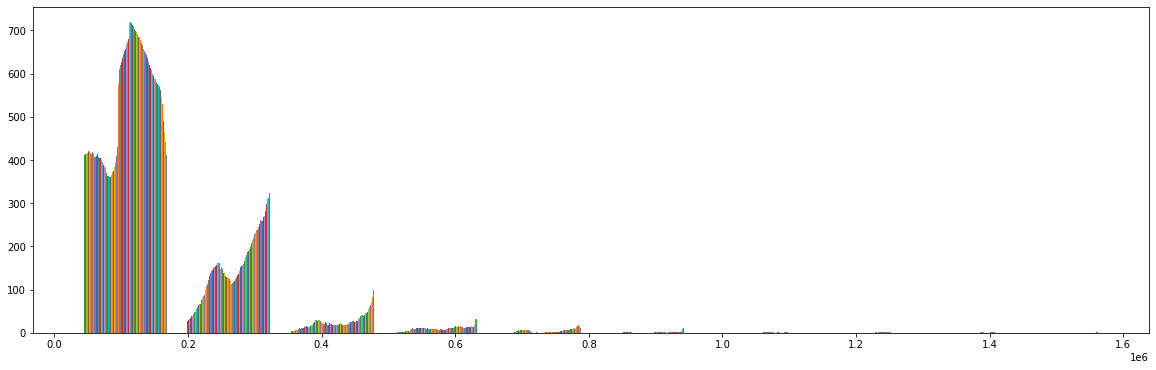

In [14]:
# plotting a hisotgram for all the non-string columns
before_null_hist_plot = plt.hist(df_homes.iloc[:,5:])
# display the plot
before_null_hist_plot

# 2.0 Recession quarter and bottom
Finding the recession quarters and recession bottoms using the gdp.csv dataset downloaded from https://www.bea.gov/data/gdp/gross-domestic-product

In [15]:
# load dataset gdp_1 downloaded from https://www.bea.gov/data/gdp/gross-domestic-product
df_gdp = pd.read_csv("gdp_1.csv", header = None)
# display the dataframe
df_gdp

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,Line,NaN,2000,2000,2000,2000,2001,2001,2001,2001,...,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021
1,Line,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,...,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4
2,1,Gross domestic product,10002.2,10247.7,10318.2,10435.7,10470.2,10599,10598,10660.5,...,21505,21694.5,21481.4,19477.4,21138.6,21477.6,22038.2,22741,23202.3,23992.4
3,2,Personal consumption expenditures,6618.2,6711.9,6820,6918.6,6995.3,7042.3,7070.3,7187.3,...,14529.5,14653.9,14439.1,12989.7,14293.8,14467.6,15005.4,15681.7,15964.9,16347.8
4,3,Goods,2413.1,2437.1,2469.2,2493.4,2499.2,2510.1,2515.2,2577.8,...,4512.7,4540.8,4530.9,4349.9,4867.2,4867.3,5245,5529.8,5500.1,5649.2
5,4,Durable goods,920.9,901.9,911.7,915.8,926.8,919.5,923.9,995.9,...,1531.4,1539.2,1484.9,1468.3,1753.3,1759.2,1957.8,2092.2,1995.2,2052.9
6,5,Nondurable goods,1492.2,1535.1,1557.5,1577.6,1572.4,1590.6,1591.4,1581.9,...,2981.3,3001.6,3046,2881.7,3113.9,3108.1,3287.2,3437.6,3505,3596.3
7,6,Services,4205.1,4274.9,4350.8,4425.2,4496.1,4532.1,4555.1,4609.5,...,10016.8,10113.2,9908.2,8639.8,9426.6,9600.4,9760.4,10151.9,10464.8,10698.6
8,7,Gross private domestic investment,1950.7,2075.8,2060,2067.2,1971.3,1973,1944.9,1850.1,...,3858.2,3801.9,3752.4,3167,3708.8,3923.2,3928,3925.1,4099.6,4478.7
9,8,Fixed investment,1934.5,1985.3,2002.7,2012.9,2002,1984.6,1975,1930.9,...,3791.2,3781.4,3773,3456.9,3693.8,3865.9,4022.2,4099.4,4159.8,4254


We can see that the dataset contains a lot of information other than gdp. Since we are interested only in the gdp over the years row, we will be splitting teh dataset.

In [16]:
# drop rows other than gdp and dates
df_gdp = df_gdp.loc[[0,1,2], :]
df_gdp = df_gdp.drop([0,1], axis =1)
# display the dataframe
df_gdp

,2,3,4,5,6,7,8,9,10,11,...,80,81,82,83,84,85,86,87,88,89
0,2000,2000,2000,2000,2001,2001,2001,2001,2002,2002,...,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021
1,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,...,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4
2,10002.2,10247.7,10318.2,10435.7,10470.2,10599,10598,10660.5,10783.5,10887.5,...,21505,21694.5,21481.4,19477.4,21138.6,21477.6,22038.2,22741,23202.3,23992.4


In [17]:
# type of dataframe
type(df_gdp)

pandas.core.frame.DataFrame

# Recession: 
A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
# Recession Bottom:
A recession bottom is the quarter within a recession which had the lowest GDP.

# 2.1 Finding the quarter before recession and recession bottom

In [18]:
quarter_before_recession = []
recession_bottom = []
for i in range(2,len(df_gdp.columns)-4):
    # recession : starting with two consecutive quarters of GDP decline and the two quarters continuous increment
    if (float(df_gdp[i].iloc[2]) > float(df_gdp[i+1].iloc[2])) & (float(df_gdp[i+1].iloc[2]) > float(df_gdp[i+2].iloc[2])):
        # append year and quarter
        quarter_before_recession.append([df_gdp[i-1].iloc[0],df_gdp[i-1].iloc[1]])
    if (float(df_gdp[i].iloc[2]) > float(df_gdp[i+1].iloc[2])) & (float(df_gdp[i+1].iloc[2]) > float(df_gdp[i+2].iloc[2])) & (float(df_gdp[i+2].iloc[2]) < float(df_gdp[i+3].iloc[2])) & (float(df_gdp[i+3].iloc[2]) < float(df_gdp[i+4].iloc[2])) : 
        # lowest gdp of 4 years in which recession occurred
        min_list = [float(df_gdp[i+1].iloc[2]), float(df_gdp[i+2].iloc[2]), float(df_gdp[i+3].iloc[2]), float(df_gdp[i+4].iloc[2])]
        index_min = min_list.index(min(min_list))
        # append year and quarter
        recession_bottom.append([df_gdp[i+index_min+1].iloc[0],df_gdp[i+index_min+1].iloc[1]])
print("Quarter before recession: ",quarter_before_recession)
print("Recession bottom: ",recession_bottom)

Quarter before recession:  [['2008', 'Q2'], ['2008', 'Q3'], ['2019', 'Q3']]
Recession bottom:  [['2009', 'Q2'], ['2020', 'Q2']]


In [19]:
list_2019_br = ['2019-07-31', '2019-08-31', '2019-09-30']
list_2019_rb = ['2020-04-30', '2020-05-31', '2020-06-30']
list_2008_br = ['2008-04-30', '2008-05-31', '2008-06-30']
list_2008_rb = ['2009-04-30', '2009-05-31', '2009-06-30']

# 3.0 University Towns
A university town is a city which has a high percentage of university students compared to the total population of the city.

In the below codes, we will be fidning the university towns from the dataset downaloaded from https://en.wikipedia.org/wiki/List_of_college_towns.

In [20]:
# load dataset zhvi_all_homes downloaded from https://www.bea.gov/data/gdp/gross-domestic-product
df_towns = pd.read_csv("university_towns.txt", sep = "delimiter", engine='python')
# display the dataframe
df_towns

,College towns in the United States
0,Alabama
1,"Auburn (Auburn University, Edward Via College ..."
2,"Dothan (Fortis College, Troy University Dothan..."
3,Fairfield (Miles College)
4,"Florence (Heritage Christian University, Unive..."
...,...
871,Laramie (University of Wyoming)[14]
872,Puerto Rico
873,"Mayagüez, Puerto Rico (UPR Mayagüez, Hostos Sc..."
874,"Ponce, Puerto Rico (Caribbean University, Inte..."


Since the column of college towns contain a lot more details along with the name of the towns, we have spit the data to extract only the college towns. 

In [21]:
# split column and add new columns to df
df_towns[['College Towns', 'Splitted']] = df_towns['College towns in the United States'].str.split(n=1, expand=True)
# display the dataframe
df_towns

,College towns in the United States,College Towns,Splitted
0,Alabama,Alabama,None
1,"Auburn (Auburn University, Edward Via College ...",Auburn,"(Auburn University, Edward Via College of Oste..."
2,"Dothan (Fortis College, Troy University Dothan...",Dothan,"(Fortis College, Troy University Dothan Campus..."
3,Fairfield (Miles College),Fairfield,(Miles College)
4,"Florence (Heritage Christian University, Unive...",Florence,"(Heritage Christian University, University of ..."
...,...,...,...
871,Laramie (University of Wyoming)[14],Laramie,(University of Wyoming)[14]
872,Puerto Rico,Puerto,Rico
873,"Mayagüez, Puerto Rico (UPR Mayagüez, Hostos Sc...","Mayagüez,","Puerto Rico (UPR Mayagüez, Hostos School of La..."
874,"Ponce, Puerto Rico (Caribbean University, Inte...","Ponce,","Puerto Rico (Caribbean University, Inter-Ameri..."


In [22]:
# dropping the rows which are not of our interest
df_towns = df_towns.drop(["College towns in the United States", "Splitted"], 1)
# display the dataframe
df_towns

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/532184869.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_towns = df_towns.drop(["College towns in the United States", "Splitted"], 1)


,College Towns
0,Alabama
1,Auburn
2,Dothan
3,Fairfield
4,Florence
...,...
871,Laramie
872,Puerto
873,"Mayagüez,"
874,"Ponce,"


In [23]:
# converting the dataframe column to a town list
town_list = df_towns["College Towns"].to_list()
# display the dataframe
town_list

['Alabama',
 'Auburn',
 'Dothan',
 'Fairfield',
 'Florence',
 'Homewood',
 'Huntsville',
 'Jacksonville',
 'Livingston',
 'Marion',
 'Mobile',
 'Montevallo',
 'Montgomery',
 'Troy',
 'Tuscaloosa',
 'Tuskegee',
 'Alaska',
 'Anchorage',
 'Fairbanks',
 'Juneau',
 'Ketchikan',
 'Sitka',
 'Arizona',
 'Chandler',
 'Flagstaff',
 'Gilbert',
 'Glendale',
 'Lake',
 'Mesa',
 'Peoria',
 'Prescott',
 'Scottsdale',
 'Tempe',
 'Tucson',
 'Arkansas',
 'Arkadelphia',
 'Conway',
 'Fayetteville',
 'Fort',
 'Jonesboro',
 'Little',
 'Magnolia',
 'Monticello',
 'Russellville',
 'Searcy',
 'California',
 'Angwin',
 'Arcata',
 'Azusa',
 'Berkeley',
 'Chico',
 'Claremont',
 'Cotati',
 'Davis',
 'Irvine',
 'Isla',
 'La',
 'Loma',
 'Merced',
 'Palo',
 'Pasadena',
 'Pomona',
 'Redlands',
 'Riverside',
 'Rocklin',
 'San',
 'San',
 'Santa',
 'Santa',
 'Seaside',
 'Stanford',
 'Turlock',
 'Whittier',
 'Colorado',
 'Alamosa',
 'Aurora',
 'Boulder',
 'Colorado',
 'Durango',
 'Fort',
 'Golden',
 'Grand',
 'Greeley',
 '

# 3.1 Extracting the university town homes

We will be deleting the rows that are other than home values across the dates, fr example regionID, sizeRank, etc.

In [24]:
drop_list = []
for i in df_homes.index:
    # compare the RegionName against the names in the town_list
    if df_homes.iloc[i,:]["RegionName"].split(",")[0] not in town_list:
        drop_list.append(i)
print("Length of lists to be dropped from the df_homes: ",len(drop_list))

Length of lists to be dropped from the df_homes:  542


We have found the indexes for the non university towns which we will be using later for categorising the data into "Non university towns" and "univeristy towns" after filling the null values.

In [25]:
# converting all the columns to numeric format
for i in df_homes.iloc[:,5:].columns:
    df_homes[i] = pd.to_numeric(df_homes[i])

In [26]:
# drop the rows from the df_homes that are added in the drop_list
df_uni_homes = df_homes.drop(drop_list)
# reset the index
df_uni_homes = df_uni_homes.reset_index()
# display the dataframe
df_uni_homes

,index,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,395209,7,"Washington, DC",Msa,DC,191888.0,192133.0,192510.0,193310.0,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.0,529871.0
1,13,395025,13,"Riverside, CA",Msa,CA,143956.0,144698.0,145338.0,146637.0,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.0,544220.0
2,23,394998,23,"Portland, OR",Msa,OR,178484.0,179164.0,179618.0,180490.0,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.0,547041.0
3,32,394492,32,"Columbus, OH",Msa,OH,133439.0,133621.0,133879.0,134351.0,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.0,275240.0
4,35,394355,35,"Austin, TX",Msa,TX,181095.0,181887.0,182516.0,183438.0,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.0,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,880,394718,901,"Jamestown, ND",Msa,ND,NaN,NaN,NaN,NaN,...,173757.0,174647.0,175555.0,176544.0,177529.0,178447.0,179338.0,180189.0,182662.0,184918.0
361,885,394996,910,"Portales, NM",Msa,NM,NaN,NaN,NaN,NaN,...,111481.0,112178.0,112792.0,113210.0,113571.0,114196.0,114639.0,115325.0,NaN,120718.0
362,893,753880,920,"Fairfield, IA",Msa,IA,NaN,NaN,NaN,NaN,...,132348.0,132672.0,133505.0,134102.0,134893.0,135835.0,136576.0,137154.0,138897.0,140804.0
363,901,395186,928,"Vermillion, SD",Msa,SD,NaN,NaN,NaN,NaN,...,200884.0,202358.0,204580.0,206645.0,208726.0,210296.0,211478.0,212305.0,215363.0,218641.0


In [27]:
df_non_uni_homes = df_homes.drop(df_uni_homes.index)
df_non_uni_homes

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,394794,365,"Lima, OH",Msa,OH,83134.0,83448.0,83694.0,84262.0,84681.0,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.0,155040.0
366,394495,366,"Cookeville, TN",Msa,TN,92333.0,92476.0,92686.0,92959.0,93110.0,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.0,227482.0
367,753872,367,"California-Lexington Park, MD",Msa,MD,162883.0,162780.0,163020.0,163748.0,164713.0,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.0,369211.0
368,394620,368,"Gadsden, AL",Msa,AL,NaN,NaN,NaN,NaN,NaN,...,103002.0,104849.0,107220.0,109655.0,111969.0,114058.0,116242.0,117597.0,120490.0,123024.0
369,394513,369,"Cumberland, MD",Msa,MD,60160.0,60208.0,60302.0,60467.0,60685.0,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.0,120219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,753874,930,"Craig, CO",Msa,CO,95216.0,95562.0,96148.0,96843.0,97562.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,NaN,84231.0


In [28]:
df_uni_homes = df_uni_homes.dropna()
df_uni_homes

,index,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,395209,7,"Washington, DC",Msa,DC,191888.0,192133.0,192510.0,193310.0,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.0,529871.0
1,13,395025,13,"Riverside, CA",Msa,CA,143956.0,144698.0,145338.0,146637.0,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.0,544220.0
2,23,394998,23,"Portland, OR",Msa,OR,178484.0,179164.0,179618.0,180490.0,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.0,547041.0
3,32,394492,32,"Columbus, OH",Msa,OH,133439.0,133621.0,133879.0,134351.0,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.0,275240.0
4,35,394355,35,"Austin, TX",Msa,TX,181095.0,181887.0,182516.0,183438.0,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.0,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,769,753892,782,"Jackson, OH",Msa,OH,53324.0,53187.0,53381.0,53542.0,...,93054.0,93762.0,94796.0,95512.0,96381.0,97116.0,98051.0,98866.0,100676.0,102435.0
324,776,394433,789,"Cambridge, MD",Msa,MD,82257.0,82451.0,82523.0,82749.0,...,167625.0,169893.0,171945.0,174126.0,176251.0,178292.0,180176.0,181542.0,183557.0,185472.0
325,777,394812,790,"Macomb, IL",Msa,IL,49272.0,49336.0,49474.0,49745.0,...,80963.0,81540.0,82012.0,82393.0,82792.0,83111.0,83310.0,83563.0,84231.0,84926.0
337,795,394786,812,"Lewisburg, TN",Msa,TN,94534.0,94827.0,95009.0,95392.0,...,208278.0,211175.0,214471.0,218072.0,221789.0,226378.0,231756.0,237646.0,245200.0,253526.0


In [29]:
df_non_uni_homes = df_non_uni_homes.dropna()
df_non_uni_homes

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,394794,365,"Lima, OH",Msa,OH,83134.0,83448.0,83694.0,84262.0,84681.0,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.0,155040.0
366,394495,366,"Cookeville, TN",Msa,TN,92333.0,92476.0,92686.0,92959.0,93110.0,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.0,227482.0
367,753872,367,"California-Lexington Park, MD",Msa,MD,162883.0,162780.0,163020.0,163748.0,164713.0,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.0,369211.0
369,394513,369,"Cumberland, MD",Msa,MD,60160.0,60208.0,60302.0,60467.0,60685.0,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.0,120219.0
373,394709,373,"Ithaca, NY",Msa,NY,95765.0,96313.0,96706.0,97496.0,98137.0,...,239918.0,240577.0,242920.0,245721.0,248090.0,251307.0,254499.0,257982.0,260991.0,265526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,753921,872,"Steamboat Springs, CO",Msa,CO,236219.0,237032.0,238128.0,240602.0,243304.0,...,678535.0,694440.0,718786.0,745882.0,776306.0,803020.0,828846.0,849040.0,869414.0,890467.0
856,394337,876,"Arkadelphia, AR",Msa,AR,61139.0,60876.0,61375.0,61894.0,62714.0,...,97419.0,98462.0,98784.0,98803.0,98708.0,99411.0,99919.0,100429.0,102175.0,104330.0
883,395135,908,"Storm Lake, IA",Msa,IA,70788.0,71052.0,71211.0,71604.0,71883.0,...,132805.0,133772.0,134780.0,135728.0,136638.0,137859.0,138611.0,139278.0,140852.0,142875.0
884,395236,909,"Woodward, OK",Msa,OK,58850.0,58898.0,58938.0,59057.0,59172.0,...,115167.0,116026.0,116868.0,117813.0,118593.0,119248.0,119840.0,120403.0,122735.0,124763.0


In [30]:
def price_ratio(before_recession, recession_bottom):
    ratio_uni_homes = df_uni_homes[before_recession].mean(axis=1)/df_uni_homes[recession_bottom].mean(axis=1)
    ratio_non_uni_homes = df_non_uni_homes[before_recession].mean(axis=1)/df_non_uni_homes[recession_bottom].mean(axis=1)
    return ratio_uni_homes, ratio_non_uni_homes

In [31]:
uni_homes, non_uni_homes = price_ratio(list_2019_br, list_2019_rb)
ttest_null_2019 =ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_null_2019

Ttest_indResult(statistic=-2.1287974769471503, pvalue=0.03451384566704291)

In [32]:
uni_homes, non_uni_homes = price_ratio(list_2008_br, list_2008_rb)
ttest_null_2008 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_null_2008

Ttest_indResult(statistic=1.7224464287830774, pvalue=0.08618774141067738)

In [33]:
# Transposing the data
df_homes = df_homes.transpose()
# dropping a list of rows
df_homes = df_homes.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
# display the dataframe
df_homes

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
2000-01-31,127215.0,223454.0,231141.0,169006.0,130305.0,129210.0,125299.0,191888.0,126285.0,153054.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95216.0,NaN,NaN,NaN
2000-02-29,127559.0,224790.0,231946.0,169405.0,130410.0,129643.0,125376.0,192133.0,126751.0,153564.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95562.0,NaN,NaN,NaN
2000-03-31,127921.0,225991.0,233179.0,169921.0,130496.0,129903.0,125258.0,192510.0,127167.0,154087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96148.0,NaN,NaN,NaN
2000-04-30,128658.0,228356.0,235523.0,170954.0,130708.0,130549.0,125376.0,193310.0,127986.0,155148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96843.0,NaN,NaN,NaN
2000-05-31,129402.0,230557.0,238036.0,172049.0,130930.0,131072.0,125383.0,194422.0,128660.0,156185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97562.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,308663.0,562411.0,846358.0,281790.0,326735.0,305727.0,267783.0,516946.0,373251.0,314331.0,...,277443.0,87829.0,200203.0,110236.0,210296.0,88778.0,241035.0,159375.0,79228.0,336069.0
2021-10-31,312760.0,566942.0,851116.0,284434.0,332809.0,308169.0,272047.0,519809.0,381499.0,321709.0,...,278942.0,88149.0,200994.0,110792.0,211478.0,89714.0,244026.0,164004.0,79579.0,338017.0
2021-11-30,316645.0,570483.0,858319.0,287113.0,338271.0,310638.0,275190.0,522710.0,389214.0,329212.0,...,280024.0,88590.0,201351.0,111261.0,212305.0,90281.0,245647.0,165025.0,79866.0,339577.0
2021-12-31,320978.0,573707.0,867616.0,289816.0,344143.0,312907.0,278584.0,526104.0,396515.0,336989.0,...,NaN,90206.0,NaN,NaN,215363.0,91858.0,249065.0,167743.0,NaN,NaN


In [34]:
index = df_homes.index
index

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31'],
      dtype='object', length=265)

In [35]:
# dilsplaying the column wise mean
df_homes.mean()

0      195463.350943
1      408023.984906
2      508485.762264
3      222944.339623
4      179148.354717
           ...      
902     62536.876923
903    159633.087121
904    141482.000000
905     62229.773333
906    275160.995000
Length: 907, dtype: float64

# 4.0 Fill the null values
We have filled the null values using the mean of each row.

We have different methods for filling the null values:

4.1 Simple Imputer - Using mean 

4.2 KNN Imputer

4.3 Linear Regression over the town against index

4.4 Linear Regression over the town against state data

We have compared the results of the above 4 methods at the end.

# 4.1 Simple Imputer - Using mean

Fill the null values using SimpleImputer from sklearn library, using the strategy as mean.

In [36]:
X = df_homes.iloc[:].values
# For calculating mean we used Simple Imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

df_homes_mean = pd.DataFrame(X)
df_homes_mean["Dates"] = index
df_homes_mean = df_homes_mean.set_index("Dates")
df_homes_mean = df_homes_mean.transpose()

# display the dataframe
df_homes_mean

Dates,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,127215.000000,127559.000000,127921.000000,128658.000000,129402.000000,130143.000000,130899.000000,131705.000000,132529.000000,133357.000000,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.000000,325677.0
1,223454.000000,224790.000000,225991.000000,228356.000000,230557.000000,232902.000000,235365.000000,237914.000000,240472.000000,243002.000000,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.000000,577647.0
2,231141.000000,231946.000000,233179.000000,235523.000000,238036.000000,240408.000000,242839.000000,245389.000000,247818.000000,250040.000000,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.000000,878396.0
3,169006.000000,169405.000000,169921.000000,170954.000000,172049.000000,173133.000000,174334.000000,175680.000000,177071.000000,178440.000000,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.000000,292436.0
4,130305.000000,130410.000000,130496.000000,130708.000000,130930.000000,131115.000000,131314.000000,131681.000000,132137.000000,132667.000000,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.000000,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.000000,93464.0
903,95216.000000,95562.000000,96148.000000,96843.000000,97562.000000,98104.000000,99203.000000,99880.000000,100014.000000,99595.000000,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.000000,252041.0
904,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.000000,170409.0
905,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,62229.773333,84231.0


(array([[771., 117.,  16., ...,   0.,   0.,   0.],
        [771., 117.,  16., ...,   0.,   0.,   0.],
        [771., 117.,  16., ...,   0.,   0.,   0.],
        ...,
        [436., 324.,  85., ...,   2.,   1.,   1.],
        [455., 302.,  87., ...,   2.,   1.,   1.],
        [413., 327.,  99., ...,   2.,   1.,   1.]]),
 array([  28549. ,  183531.6,  338514.2,  493496.8,  648479.4,  803462. ,
         958444.6, 1113427.2, 1268409.8, 1423392.4, 1578375. ]),
 <a list of 265 BarContainer objects>)

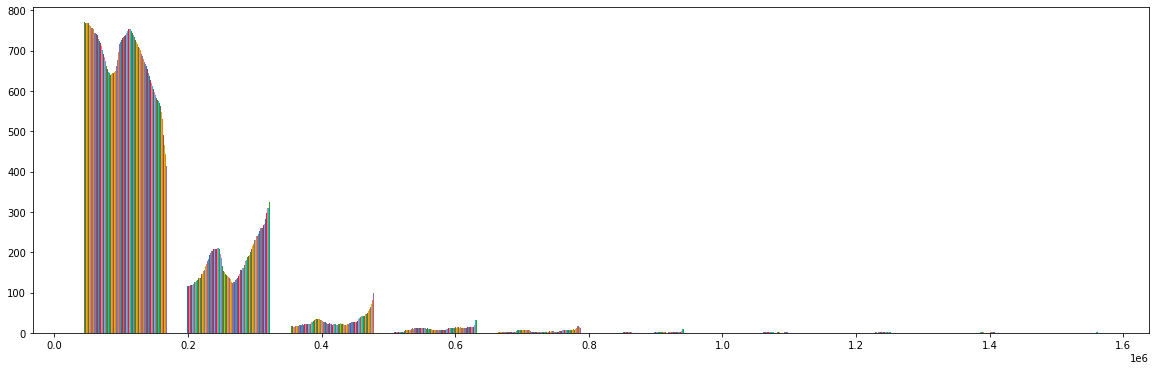

In [37]:
# plotting a hisotgram for all the non-string columns
after_null_hist_plot = plt.hist(df_homes_mean)
#display the plot
after_null_hist_plot

In [38]:
before_null_hist_plot, after_null_hist_plot

((array([[410.,  28.,   5., ...,   0.,   0.,   0.],
         [411.,  28.,   5., ...,   0.,   0.,   0.],
         [412.,  28.,   5., ...,   0.,   0.,   0.],
         ...,
         [436., 324.,  85., ...,   2.,   1.,   1.],
         [286., 281.,  85., ...,   2.,   1.,   1.],
         [412., 326.,  99., ...,   2.,   1.,   1.]]),
  array([  28549. ,  183531.6,  338514.2,  493496.8,  648479.4,  803462. ,
          958444.6, 1113427.2, 1268409.8, 1423392.4, 1578375. ]),
  <a list of 265 BarContainer objects>),
 (array([[771., 117.,  16., ...,   0.,   0.,   0.],
         [771., 117.,  16., ...,   0.,   0.,   0.],
         [771., 117.,  16., ...,   0.,   0.,   0.],
         ...,
         [436., 324.,  85., ...,   2.,   1.,   1.],
         [455., 302.,  87., ...,   2.,   1.,   1.],
         [413., 327.,  99., ...,   2.,   1.,   1.]]),
  array([  28549. ,  183531.6,  338514.2,  493496.8,  648479.4,  803462. ,
          958444.6, 1113427.2, 1268409.8, 1423392.4, 1578375. ]),
  <a list of 265 BarC

In [39]:
# drop the rows from the df_homes that are added in the drop_list
df_uni_homes = df_homes_mean.drop(drop_list)
# reset the index
df_uni_homes = df_uni_homes.reset_index()
# display the dataframe
df_uni_homes

Dates,index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,191888.000000,192133.000000,192510.000000,193310.000000,194422.000000,195645.000000,197168.000000,198813.000000,200458.000000,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.00000,529871.0
1,13,143956.000000,144698.000000,145338.000000,146637.000000,147809.000000,149028.000000,150208.000000,151606.000000,152975.000000,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.00000,544220.0
2,23,178484.000000,179164.000000,179618.000000,180490.000000,180961.000000,181413.000000,181864.000000,182495.000000,182889.000000,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.00000,547041.0
3,32,133439.000000,133621.000000,133879.000000,134351.000000,134848.000000,135313.000000,135843.000000,136481.000000,137093.000000,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.00000,275240.0
4,35,181095.000000,181887.000000,182516.000000,183438.000000,184023.000000,184129.000000,184120.000000,184963.000000,185688.000000,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.00000,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,880,169192.972603,169192.972603,169192.972603,169192.972603,169192.972603,169192.972603,169192.972603,169192.972603,169192.972603,...,173757.0,174647.0,175555.0,176544.0,177529.0,178447.0,179338.0,180189.0,182662.00000,184918.0
361,885,85739.046980,85739.046980,85739.046980,85739.046980,85739.046980,85739.046980,85739.046980,85739.046980,85739.046980,...,111481.0,112178.0,112792.0,113210.0,113571.0,114196.0,114639.0,115325.0,85739.04698,120718.0
362,893,109637.803922,109637.803922,109637.803922,109637.803922,109637.803922,109637.803922,109637.803922,109637.803922,109637.803922,...,132348.0,132672.0,133505.0,134102.0,134893.0,135835.0,136576.0,137154.0,138897.00000,140804.0
363,901,180965.732143,180965.732143,180965.732143,180965.732143,180965.732143,180965.732143,180965.732143,180965.732143,180965.732143,...,200884.0,202358.0,204580.0,206645.0,208726.0,210296.0,211478.0,212305.0,215363.00000,218641.0


In [40]:
df_non_uni_homes = df_homes_mean.drop(df_uni_homes.index)
df_non_uni_homes

Dates,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,83134.000000,83448.000000,83694.000000,84262.000000,84681.000000,84967.000000,85104.000000,85251.000000,85451.000000,85647.000000,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.000000,155040.0
366,92333.000000,92476.000000,92686.000000,92959.000000,93110.000000,93096.000000,93309.000000,93673.000000,94063.000000,94239.000000,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.000000,227482.0
367,162883.000000,162780.000000,163020.000000,163748.000000,164713.000000,165619.000000,166259.000000,167017.000000,167638.000000,168234.000000,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.000000,369211.0
368,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,83254.088608,...,103002.0,104849.0,107220.0,109655.0,111969.0,114058.0,116242.0,117597.0,120490.000000,123024.0
369,60160.000000,60208.000000,60302.000000,60467.000000,60685.000000,60933.000000,61228.000000,61489.000000,61628.000000,61778.000000,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.000000,120219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,62536.876923,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.000000,93464.0
903,95216.000000,95562.000000,96148.000000,96843.000000,97562.000000,98104.000000,99203.000000,99880.000000,100014.000000,99595.000000,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.000000,252041.0
904,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,141482.000000,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.000000,170409.0
905,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,62229.773333,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,62229.773333,84231.0


The below values are calculated after filling the null values and they give us better results.

In [41]:
uni_homes, non_uni_homes = price_ratio(list_2019_br, list_2019_rb)
ttest_mean_2019 =ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_mean_2019

Ttest_indResult(statistic=-3.213321288505357, pvalue=0.0013651236418960391)

In [42]:
uni_homes, non_uni_homes = price_ratio(list_2008_br, list_2008_rb)
ttest_mean_2008 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_mean_2008

Ttest_indResult(statistic=0.37670891614150337, pvalue=0.7064977847943883)

# 4.2 KNN Imputer

Fill the null values using the KNNImputer from sklearn library.

In [43]:
X = df_homes.iloc[:].values
# For calculating mean we used Simple Imputer class
imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)

df_homes_KNN = pd.DataFrame(X)
df_homes_KNN["Dates"] = index
df_homes_KNN = df_homes_KNN.set_index("Dates")
df_homes_KNN = df_homes_KNN.transpose()

# display the dataframe
df_homes_KNN

Dates,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,127215.0,127559.0,127921.0,128658.0,129402.0,130143.0,130899.0,131705.0,132529.0,133357.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,223454.0,224790.0,225991.0,228356.0,230557.0,232902.0,235365.0,237914.0,240472.0,243002.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,231141.0,231946.0,233179.0,235523.0,238036.0,240408.0,242839.0,245389.0,247818.0,250040.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,169006.0,169405.0,169921.0,170954.0,172049.0,173133.0,174334.0,175680.0,177071.0,178440.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,130305.0,130410.0,130496.0,130708.0,130930.0,131115.0,131314.0,131681.0,132137.0,132667.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45376.0,45376.0,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,95216.0,95562.0,96148.0,96843.0,97562.0,98104.0,99203.0,99880.0,100014.0,99595.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51178.5,51178.5,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,82048.5,84231.0


(array([[826.,  72.,   8., ...,   0.,   0.,   0.],
        [826.,  72.,   8., ...,   0.,   0.,   0.],
        [826.,  72.,   8., ...,   0.,   0.,   0.],
        ...,
        [436., 324.,  85., ...,   2.,   1.,   1.],
        [425., 325.,  92., ...,   2.,   1.,   1.],
        [413., 327.,  99., ...,   2.,   1.,   1.]]),
 array([  28549. ,  183531.6,  338514.2,  493496.8,  648479.4,  803462. ,
         958444.6, 1113427.2, 1268409.8, 1423392.4, 1578375. ]),
 <a list of 265 BarContainer objects>)

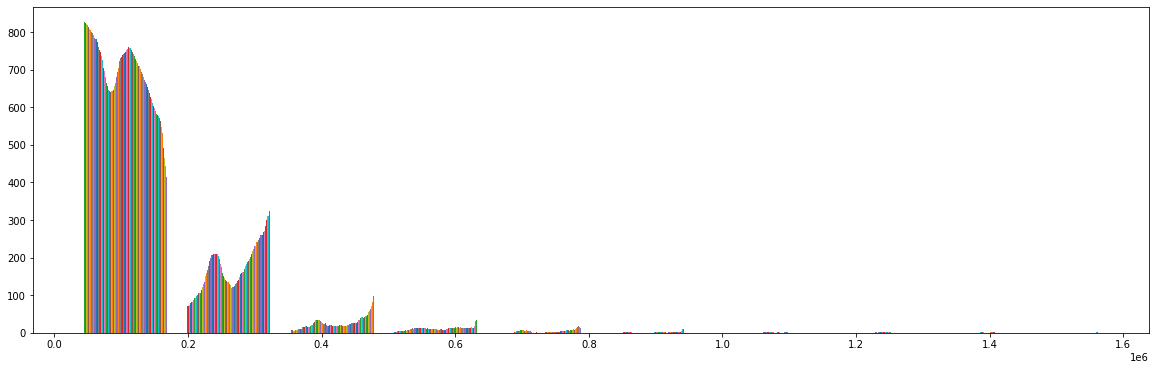

In [44]:
plt.hist(df_homes_KNN)

In [45]:
# drop the rows from the df_homes that are added in the drop_list
df_uni_homes = df_homes_KNN.drop(drop_list)
# reset the index
df_uni_homes = df_uni_homes.reset_index()
# display the dataframe
df_uni_homes

Dates,index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,191888.0,192133.0,192510.0,193310.0,194422.0,195645.0,197168.0,198813.0,200458.0,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.0,529871.0
1,13,143956.0,144698.0,145338.0,146637.0,147809.0,149028.0,150208.0,151606.0,152975.0,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.0,544220.0
2,23,178484.0,179164.0,179618.0,180490.0,180961.0,181413.0,181864.0,182495.0,182889.0,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.0,547041.0
3,32,133439.0,133621.0,133879.0,134351.0,134848.0,135313.0,135843.0,136481.0,137093.0,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.0,275240.0
4,35,181095.0,181887.0,182516.0,183438.0,184023.0,184129.0,184120.0,184963.0,185688.0,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.0,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,880,156841.0,156841.0,156841.0,156841.0,156841.0,156841.0,156841.0,156841.0,156841.0,...,173757.0,174647.0,175555.0,176544.0,177529.0,178447.0,179338.0,180189.0,182662.0,184918.0
361,885,72040.0,72040.0,72040.0,72040.0,72040.0,72040.0,72040.0,72040.0,72286.5,...,111481.0,112178.0,112792.0,113210.0,113571.0,114196.0,114639.0,115325.0,118021.5,120718.0
362,893,97157.5,97157.5,97157.5,97157.5,97157.5,97157.5,97157.5,97157.5,96994.0,...,132348.0,132672.0,133505.0,134102.0,134893.0,135835.0,136576.0,137154.0,138897.0,140804.0
363,901,159933.5,159933.5,159933.5,159933.5,159933.5,159933.5,159933.5,159933.5,159933.5,...,200884.0,202358.0,204580.0,206645.0,208726.0,210296.0,211478.0,212305.0,215363.0,218641.0


In [46]:
df_non_uni_homes = df_homes_KNN.drop(df_uni_homes.index)
df_non_uni_homes

Dates,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,83134.0,83448.0,83694.0,84262.0,84681.0,84967.0,85104.0,85251.0,85451.0,85647.0,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.0,155040.0
366,92333.0,92476.0,92686.0,92959.0,93110.0,93096.0,93309.0,93673.0,94063.0,94239.0,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.0,227482.0
367,162883.0,162780.0,163020.0,163748.0,164713.0,165619.0,166259.0,167017.0,167638.0,168234.0,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.0,369211.0
368,65270.0,65270.0,65270.0,65270.0,65270.0,65270.0,65270.0,65270.0,65270.0,65270.0,...,103002.0,104849.0,107220.0,109655.0,111969.0,114058.0,116242.0,117597.0,120490.0,123024.0
369,60160.0,60208.0,60302.0,60467.0,60685.0,60933.0,61228.0,61489.0,61628.0,61778.0,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.0,120219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45342.5,45376.0,45376.0,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,95216.0,95562.0,96148.0,96843.0,97562.0,98104.0,99203.0,99880.0,100014.0,99595.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,126040.0,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51150.5,51178.5,51178.5,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,82048.5,84231.0


In [47]:
uni_homes, non_uni_homes = price_ratio(list_2019_br, list_2019_rb)
ttest_KNN_2019 =ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_KNN_2019

Ttest_indResult(statistic=-3.2384706779726016, pvalue=0.0012534236801671657)

In [48]:
uni_homes, non_uni_homes = price_ratio(list_2008_br, list_2008_rb)
ttest_KNN_2008 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_KNN_2008

Ttest_indResult(statistic=-0.10391559201259327, pvalue=0.917265889413218)

# 4.3 Linear Regression over the town against index

Fill the null values using the linear regression over the town and training the model with non null values and predicting the values which were null.

In [49]:
# reset the index to integers
df_homes_lin = df_homes.reset_index()
# display the dataframe
df_homes_lin

,index,0,1,2,3,4,5,6,7,8,...,897,898,899,900,901,902,903,904,905,906
0,2000-01-31,127215.0,223454.0,231141.0,169006.0,130305.0,129210.0,125299.0,191888.0,126285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95216.0,NaN,NaN,NaN
1,2000-02-29,127559.0,224790.0,231946.0,169405.0,130410.0,129643.0,125376.0,192133.0,126751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95562.0,NaN,NaN,NaN
2,2000-03-31,127921.0,225991.0,233179.0,169921.0,130496.0,129903.0,125258.0,192510.0,127167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96148.0,NaN,NaN,NaN
3,2000-04-30,128658.0,228356.0,235523.0,170954.0,130708.0,130549.0,125376.0,193310.0,127986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96843.0,NaN,NaN,NaN
4,2000-05-31,129402.0,230557.0,238036.0,172049.0,130930.0,131072.0,125383.0,194422.0,128660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97562.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2021-09-30,308663.0,562411.0,846358.0,281790.0,326735.0,305727.0,267783.0,516946.0,373251.0,...,277443.0,87829.0,200203.0,110236.0,210296.0,88778.0,241035.0,159375.0,79228.0,336069.0
261,2021-10-31,312760.0,566942.0,851116.0,284434.0,332809.0,308169.0,272047.0,519809.0,381499.0,...,278942.0,88149.0,200994.0,110792.0,211478.0,89714.0,244026.0,164004.0,79579.0,338017.0
262,2021-11-30,316645.0,570483.0,858319.0,287113.0,338271.0,310638.0,275190.0,522710.0,389214.0,...,280024.0,88590.0,201351.0,111261.0,212305.0,90281.0,245647.0,165025.0,79866.0,339577.0
263,2021-12-31,320978.0,573707.0,867616.0,289816.0,344143.0,312907.0,278584.0,526104.0,396515.0,...,NaN,90206.0,NaN,NaN,215363.0,91858.0,249065.0,167743.0,NaN,NaN


In [50]:
lin = LinearRegression()
for i in df_homes_lin.columns[1:]:
    if df_homes_lin[i].isnull().sum() > 0:
        # the columns having nan values
        testdf = df_homes_lin[df_homes_lin[i].isnull()==True]
        traindf = df_homes_lin[df_homes_lin[i].isnull()==False]
        y = traindf[i]
        
        # fitting and predicting on the linear regression
        lin.fit(pd.DataFrame(traindf.index).values.reshape(-1, 1), y)
        pred = lin.predict(pd.DataFrame(testdf.index).values.reshape(-1, 1))
        
        # replacing the predicted values with nan in the testdf
        testdf[i] = pred
        
        # replacing the predicted values with nan in the df_homes_lin
        for j in testdf.index:
            df_homes_lin[i][j] = testdf[i][j]
            
# display the dataframe
df_homes_lin

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[i] = pred
C:\Users\farha\AppData\Local\Temp/ipykernel_9220/3270551266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,index,0,1,2,3,4,5,6,7,8,...,897,898,899,900,901,902,903,904,905,906
0,2000-01-31,127215.0,223454.0,231141.0,169006.0,130305.0,129210.0,125299.0,191888.0,126285.0,...,12492.912111,14054.849151,-18733.531504,10102.536161,-46516.464662,-8286.146693,95216.0,-299094.066325,22855.919713,212168.579002
1,2000-02-29,127559.0,224790.0,231946.0,169405.0,130410.0,129643.0,125376.0,192133.0,126751.0,...,13486.740487,14330.973475,-17944.52088,10469.987816,-45554.594908,-7931.144069,95562.0,-297342.272821,23065.82404,212553.841936
2,2000-03-31,127921.0,225991.0,233179.0,169921.0,130496.0,129903.0,125258.0,192510.0,127167.0,...,14480.568863,14607.0978,-17155.510257,10837.439472,-44592.725154,-7576.141444,96148.0,-295590.479316,23275.728367,212939.10487
3,2000-04-30,128658.0,228356.0,235523.0,170954.0,130708.0,130549.0,125376.0,193310.0,127986.0,...,15474.397239,14883.222125,-16366.499633,11204.891127,-43630.8554,-7221.138819,96843.0,-293838.685812,23485.632693,213324.367804
4,2000-05-31,129402.0,230557.0,238036.0,172049.0,130930.0,131072.0,125383.0,194422.0,128660.0,...,16468.225615,15159.34645,-15577.489009,11572.342782,-42668.985646,-6866.136195,97562.0,-292086.892308,23695.53702,213709.630738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2021-09-30,308663.0,562411.0,846358.0,281790.0,326735.0,305727.0,267783.0,516946.0,373251.0,...,277443.0,87829.0,200203.0,110236.0,210296.0,88778.0,241035.0,159375.0,79228.0,336069.0
261,2021-10-31,312760.0,566942.0,851116.0,284434.0,332809.0,308169.0,272047.0,519809.0,381499.0,...,278942.0,88149.0,200994.0,110792.0,211478.0,89714.0,244026.0,164004.0,79579.0,338017.0
262,2021-11-30,316645.0,570483.0,858319.0,287113.0,338271.0,310638.0,275190.0,522710.0,389214.0,...,280024.0,88590.0,201351.0,111261.0,212305.0,90281.0,245647.0,165025.0,79866.0,339577.0
263,2021-12-31,320978.0,573707.0,867616.0,289816.0,344143.0,312907.0,278584.0,526104.0,396515.0,...,273869.774967,90206.0,188776.262553,106742.321506,215363.0,91858.0,249065.0,167743.0,78060.75766,313492.730602


In [51]:
# setting the index back to index column
df_homes_lin = df_homes_lin.set_index("index")
# transpose the matrix
df_homes_lin = df_homes_lin.transpose()
# display the dataframe
df_homes_lin

index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,127215.0,127559.0,127921.0,128658.0,129402.0,130143.0,130899.0,131705.0,132529.0,133357.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,223454.0,224790.0,225991.0,228356.0,230557.0,232902.0,235365.0,237914.0,240472.0,243002.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,231141.0,231946.0,233179.0,235523.0,238036.0,240408.0,242839.0,245389.0,247818.0,250040.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,169006.0,169405.0,169921.0,170954.0,172049.0,173133.0,174334.0,175680.0,177071.0,178440.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,130305.0,130410.0,130496.0,130708.0,130930.0,131115.0,131314.0,131681.0,132137.0,132667.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-8286.146693,-7931.144069,-7576.141444,-7221.138819,-6866.136195,-6511.13357,-6156.130945,-5801.128321,-5446.125696,-5091.123071,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,95216.0,95562.0,96148.0,96843.0,97562.0,98104.0,99203.0,99880.0,100014.0,99595.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,-299094.066325,-297342.272821,-295590.479316,-293838.685812,-292086.892308,-290335.098803,-288583.305299,-286831.511795,-285079.718291,-283327.924786,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,22855.919713,23065.82404,23275.728367,23485.632693,23695.53702,23905.441347,24115.345674,24325.250001,24535.154327,24745.058654,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,78060.75766,84231.0


(array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 27.,  4.,  2.],
        [ 0.,  0.,  0., ..., 30.,  5.,  2.],
        [ 0.,  0.,  0., ..., 30.,  7.,  2.]]),
 array([-1727890.472527472, -1397263.9252747248, -1066637.3780219776,
        -736010.8307692304, -405384.28351648315, -74757.73626373592,
        255868.8109890113, 586495.3582417585, 917121.9054945058,
        1247748.452747253, 1578375.0], dtype=object),
 <a list of 265 BarContainer objects>)

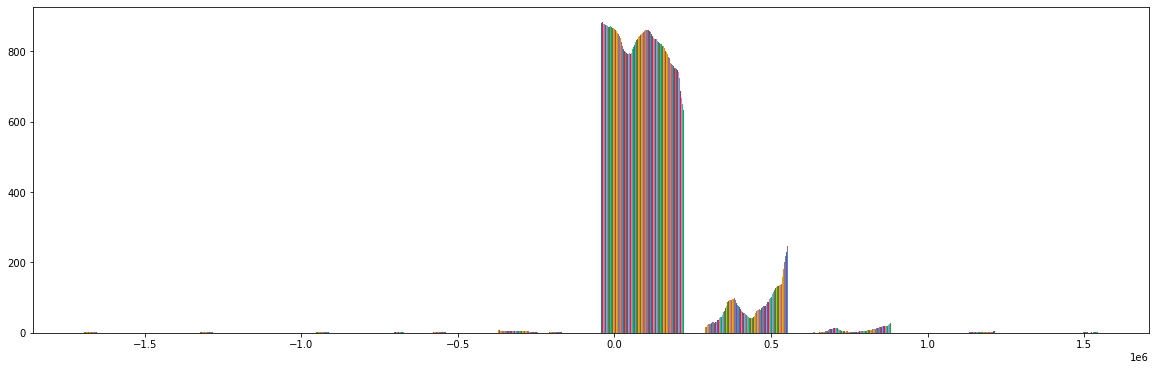

In [52]:
# plotting a hisotgram for all the non-string columns
after_null_lin_hist_plot = plt.hist(df_homes_lin)
#display the plot
after_null_lin_hist_plot

As we can see from the above plot that the ditribution here looks normal when compared to the plot which was done before filling null values which looked to be right skewed. This result looks good.

In [53]:
# checking the null values
df_homes_lin.isnull().sum()

index
2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
2000-05-31    0
             ..
2021-09-30    0
2021-10-31    0
2021-11-30    0
2021-12-31    0
2022-01-31    0
Length: 265, dtype: int64

In [54]:
# converting all the columns to numeric format
for i in df_homes_lin.columns:
    df_homes_lin[i] = pd.to_numeric(df_homes_lin[i])

In [55]:
# drop the rows from the df_homes that are added in the drop_list
df_uni_homes = df_homes_lin.drop(drop_list)
# reset the index
df_uni_homes = df_uni_homes.reset_index()
# display the dataframe
df_uni_homes

index,index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,191888.000000,192133.000000,192510.000000,193310.000000,194422.000000,195645.000000,197168.000000,198813.000000,200458.000000,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.000000,529871.0
1,13,143956.000000,144698.000000,145338.000000,146637.000000,147809.000000,149028.000000,150208.000000,151606.000000,152975.000000,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.000000,544220.0
2,23,178484.000000,179164.000000,179618.000000,180490.000000,180961.000000,181413.000000,181864.000000,182495.000000,182889.000000,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.000000,547041.0
3,32,133439.000000,133621.000000,133879.000000,134351.000000,134848.000000,135313.000000,135843.000000,136481.000000,137093.000000,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.000000,275240.0
4,35,181095.000000,181887.000000,182516.000000,183438.000000,184023.000000,184129.000000,184120.000000,184963.000000,185688.000000,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.000000,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,880,105682.352832,105960.908182,106239.463532,106518.018882,106796.574232,107075.129582,107353.684932,107632.240281,107910.795631,...,173757.0,174647.0,175555.0,176544.0,177529.0,178447.0,179338.0,180189.0,182662.000000,184918.0
361,885,30939.372515,31229.307587,31519.242659,31809.177731,32099.112803,32389.047875,32678.982947,32968.918018,33258.853090,...,111481.0,112178.0,112792.0,113210.0,113571.0,114196.0,114639.0,115325.0,107192.296429,120718.0
362,893,55208.023789,55497.543897,55787.064004,56076.584111,56366.104218,56655.624325,56945.144432,57234.664539,57524.184646,...,132348.0,132672.0,133505.0,134102.0,134893.0,135835.0,136576.0,137154.0,138897.000000,140804.0
363,901,-46516.464662,-45554.594908,-44592.725154,-43630.855400,-42668.985646,-41707.115892,-40745.246138,-39783.376384,-38821.506630,...,200884.0,202358.0,204580.0,206645.0,208726.0,210296.0,211478.0,212305.0,215363.000000,218641.0


In [56]:
df_non_uni_homes = df_homes_lin.drop(df_uni_homes.index)
df_non_uni_homes

index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,83134.000000,83448.000000,83694.000000,84262.000000,84681.000000,84967.000000,85104.000000,85251.000000,85451.000000,85647.000000,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.000000,155040.0
366,92333.000000,92476.000000,92686.000000,92959.000000,93110.000000,93096.000000,93309.000000,93673.000000,94063.000000,94239.000000,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.000000,227482.0
367,162883.000000,162780.000000,163020.000000,163748.000000,164713.000000,165619.000000,166259.000000,167017.000000,167638.000000,168234.000000,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.000000,369211.0
368,68239.625379,68342.464168,68445.302957,68548.141747,68650.980536,68753.819325,68856.658114,68959.496904,69062.335693,69165.174482,...,103002.0,104849.0,107220.0,109655.0,111969.0,114058.0,116242.0,117597.0,120490.000000,123024.0
369,60160.000000,60208.000000,60302.000000,60467.000000,60685.000000,60933.000000,61228.000000,61489.000000,61628.000000,61778.000000,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.000000,120219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-8286.146693,-7931.144069,-7576.141444,-7221.138819,-6866.136195,-6511.133570,-6156.130945,-5801.128321,-5446.125696,-5091.123071,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.000000,93464.0
903,95216.000000,95562.000000,96148.000000,96843.000000,97562.000000,98104.000000,99203.000000,99880.000000,100014.000000,99595.000000,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.000000,252041.0
904,-299094.066325,-297342.272821,-295590.479316,-293838.685812,-292086.892308,-290335.098803,-288583.305299,-286831.511795,-285079.718291,-283327.924786,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.000000,170409.0
905,22855.919713,23065.824040,23275.728367,23485.632693,23695.537020,23905.441347,24115.345674,24325.250001,24535.154327,24745.058654,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,78060.757660,84231.0


In [57]:
uni_homes, non_uni_homes = price_ratio(list_2019_br, list_2019_rb)
ttest_lin_2019 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_lin_2019

Ttest_indResult(statistic=-2.3020039217718966, pvalue=0.0215765464635338)

In [58]:
uni_homes, non_uni_homes = price_ratio(list_2008_br, list_2008_rb)
ttest_lin_2008 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_lin_2008

Ttest_indResult(statistic=-0.4868174060543586, pvalue=0.6265818258129838)

# 4.4 Linear Regression over the town against USA (Country Level) data

In [59]:
# 1st row is Country level data --> ZHVI (typical home value) across United States
#RegionType = Country and RegionName = United States

df_usa = df_homes1[df_homes1['StateName'].isnull()]
df_us = df_usa.drop(["SizeRank","RegionType","StateName","RegionName","RegionID"],axis = 1)
df_us

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,127215.0,127559.0,127921.0,128658.0,129402.0,130143.0,130899.0,131705.0,132529.0,133357.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0


In [60]:
df_us_t = df_us.T
df_us_t.reset_index()
df_us_t

,0
2000-01-31,127215.0
2000-02-29,127559.0
2000-03-31,127921.0
2000-04-30,128658.0
2000-05-31,129402.0
...,...
2021-09-30,308663.0
2021-10-31,312760.0
2021-11-30,316645.0
2021-12-31,320978.0


In [61]:
# Transposing the data
df_homes_lin1 = df_homes1.transpose()
# dropping a list of rows
df_homes_lin1 = df_homes_lin1.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
# reset the index to integers
df_homes_lin1 = df_homes_lin1.reset_index()
# display the dataframe
df_homes_lin1

,index,0,1,2,3,4,5,6,7,8,...,897,898,899,900,901,902,903,904,905,906
0,2000-01-31,127215.0,223454.0,231141.0,169006.0,130305.0,129210.0,125299.0,191888.0,126285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95216.0,NaN,NaN,NaN
1,2000-02-29,127559.0,224790.0,231946.0,169405.0,130410.0,129643.0,125376.0,192133.0,126751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95562.0,NaN,NaN,NaN
2,2000-03-31,127921.0,225991.0,233179.0,169921.0,130496.0,129903.0,125258.0,192510.0,127167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96148.0,NaN,NaN,NaN
3,2000-04-30,128658.0,228356.0,235523.0,170954.0,130708.0,130549.0,125376.0,193310.0,127986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96843.0,NaN,NaN,NaN
4,2000-05-31,129402.0,230557.0,238036.0,172049.0,130930.0,131072.0,125383.0,194422.0,128660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97562.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2021-09-30,308663.0,562411.0,846358.0,281790.0,326735.0,305727.0,267783.0,516946.0,373251.0,...,277443.0,87829.0,200203.0,110236.0,210296.0,88778.0,241035.0,159375.0,79228.0,336069.0
261,2021-10-31,312760.0,566942.0,851116.0,284434.0,332809.0,308169.0,272047.0,519809.0,381499.0,...,278942.0,88149.0,200994.0,110792.0,211478.0,89714.0,244026.0,164004.0,79579.0,338017.0
262,2021-11-30,316645.0,570483.0,858319.0,287113.0,338271.0,310638.0,275190.0,522710.0,389214.0,...,280024.0,88590.0,201351.0,111261.0,212305.0,90281.0,245647.0,165025.0,79866.0,339577.0
263,2021-12-31,320978.0,573707.0,867616.0,289816.0,344143.0,312907.0,278584.0,526104.0,396515.0,...,NaN,90206.0,NaN,NaN,215363.0,91858.0,249065.0,167743.0,NaN,NaN


In [62]:
lin = LinearRegression()
for i in df_homes_lin1.columns[1:]:
    if df_homes_lin1[i].isnull().sum() > 0:
       # the columns having nan values
        #Test Y --> Null values
        testdf_y = df_homes_lin1[i][df_homes_lin1[i].isnull()==True]
        #Train Y --> Non Null Values of each column/Region/Town
        traindf_y = df_homes_lin1[i][df_homes_lin1[i].isnull()==False]
 # Train X --> Matching Index (US index same as index corresponding to NON NULL value in column/Region/Town under calculation/loop) Values of US level prices --> 1st row/col
        traindf_x = pd.DataFrame([df_us_t.iloc[indx,0] for indx in traindf_y.index.values])
        
 #Test X --> Matching Index (US index same as index corresponding to Null value in column/Region/Town under calculation/loop) Values of US level prices --> 1st row/col
        testdf_x = pd.DataFrame([df_us_t.iloc[indx,0] for indx in testdf_y.index.values])
           # fitting and predicting on the linear regression
        lin.fit(traindf_x,traindf_y.values)
           #pred = lin.predict(pd.DataFrame(testdf.index).values.reshape(-1, 1))

           
        pred = lin.predict(testdf_x)
        pred_df = pd.DataFrame(pred).set_index(keys = testdf_y.index)


            
           

            # replacing the predicted values with nan in the df_homes_lin
        for j in pred_df.index:
            df_homes_lin1[i][j] = pred_df.loc[j,0]            
   
 # display the dataframe
df_homes_lin1

,index,0,1,2,3,4,5,6,7,8,...,897,898,899,900,901,902,903,904,905,906
0,2000-01-31,127215.0,223454.0,231141.0,169006.0,130305.0,129210.0,125299.0,191888.0,126285.0,...,153905.269166,41148.831928,56871.475965,47906.672254,108089.298867,33643.431755,95216.0,59081.738608,43480.606993,225879.573263
1,2000-02-29,127559.0,224790.0,231946.0,169405.0,130410.0,129643.0,125376.0,192133.0,126751.0,...,154155.230796,41252.732148,57177.062968,48040.382403,108286.719407,33756.4639,95562.0,59271.048836,43560.055797,226089.153784
2,2000-03-31,127921.0,225991.0,233179.0,169921.0,130496.0,129903.0,125258.0,192510.0,127167.0,...,154418.271813,41362.069007,57498.639989,48181.089014,108494.470091,33875.410517,96148.0,59470.264832,43643.661806,226309.700728
3,2000-04-30,128658.0,228356.0,235523.0,170954.0,130708.0,130549.0,125376.0,193310.0,127986.0,...,154953.800071,41584.669187,58153.342376,48467.555235,108917.432119,34117.575315,96843.0,59875.850991,43813.876249,226758.71481
4,2000-05-31,129402.0,230557.0,238036.0,172049.0,130930.0,131072.0,125383.0,194422.0,128660.0,...,155494.414758,41809.383616,58814.263104,48756.742302,109344.411426,34362.040187,97562.0,60285.289392,43985.707383,227211.993611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2021-09-30,308663.0,562411.0,846358.0,281790.0,326735.0,305727.0,267783.0,516946.0,373251.0,...,277443.0,87829.0,200203.0,110236.0,210296.0,88778.0,241035.0,159375.0,79228.0,336069.0
261,2021-10-31,312760.0,566942.0,851116.0,284434.0,332809.0,308169.0,272047.0,519809.0,381499.0,...,278942.0,88149.0,200994.0,110792.0,211478.0,89714.0,244026.0,164004.0,79579.0,338017.0
262,2021-11-30,316645.0,570483.0,858319.0,287113.0,338271.0,310638.0,275190.0,522710.0,389214.0,...,280024.0,88590.0,201351.0,111261.0,212305.0,90281.0,245647.0,165025.0,79866.0,339577.0
263,2021-12-31,320978.0,573707.0,867616.0,289816.0,344143.0,312907.0,278584.0,526104.0,396515.0,...,294699.790138,90206.0,228997.797071,123220.857262,215363.0,91858.0,249065.0,167743.0,88231.300559,343928.84805


In [63]:
df_homes_lin1 = df_homes_lin1.set_index('index')
df_homes_lin1 = df_homes_lin1.transpose()
df_homes_lin1

index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,127215.0,127559.0,127921.0,128658.0,129402.0,130143.0,130899.0,131705.0,132529.0,133357.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,223454.0,224790.0,225991.0,228356.0,230557.0,232902.0,235365.0,237914.0,240472.0,243002.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,231141.0,231946.0,233179.0,235523.0,238036.0,240408.0,242839.0,245389.0,247818.0,250040.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,169006.0,169405.0,169921.0,170954.0,172049.0,173133.0,174334.0,175680.0,177071.0,178440.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,130305.0,130410.0,130496.0,130708.0,130930.0,131115.0,131314.0,131681.0,132137.0,132667.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,33643.431755,33756.4639,33875.410517,34117.575315,34362.040187,34605.519312,34853.927165,35118.764109,35389.515525,35661.581269,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,95216.0,95562.0,96148.0,96843.0,97562.0,98104.0,99203.0,99880.0,100014.0,99595.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,59081.738608,59271.048836,59470.264832,59875.850991,60285.289392,60693.076832,61109.119078,61552.677346,62006.141382,62461.806699,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,43480.606993,43560.055797,43643.661806,43813.876249,43985.707383,44156.84565,44331.448254,44517.598649,44707.906249,44899.137672,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,88231.300559,84231.0


In [64]:
df_homes_lin1.isnull().sum()

index
2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
2000-05-31    0
             ..
2021-09-30    0
2021-10-31    0
2021-11-30    0
2021-12-31    0
2022-01-31    0
Length: 265, dtype: int64

In [65]:
# converting all the columns to numeric format
for i in df_homes_lin1.columns:
    df_homes_lin1[i] = pd.to_numeric(df_homes_lin1[i])

(array([[846.,  55.,   6., ...,   0.,   0.,   0.],
        [845.,  56.,   6., ...,   0.,   0.,   0.],
        [845.,  56.,   6., ...,   0.,   0.,   0.],
        ...,
        [412., 338.,  94., ...,   2.,   1.,   1.],
        [386., 352., 100., ...,   2.,   1.,   1.],
        [376., 359., 102., ...,   2.,   1.,   1.]]),
 array([  20764.37637063,  176525.43873357,  332286.5010965 ,
         488047.56345944,  643808.62582238,  799569.68818531,
         955330.75054825, 1111091.81291119, 1266852.87527413,
        1422613.93763706, 1578375.        ]),
 <a list of 265 BarContainer objects>)

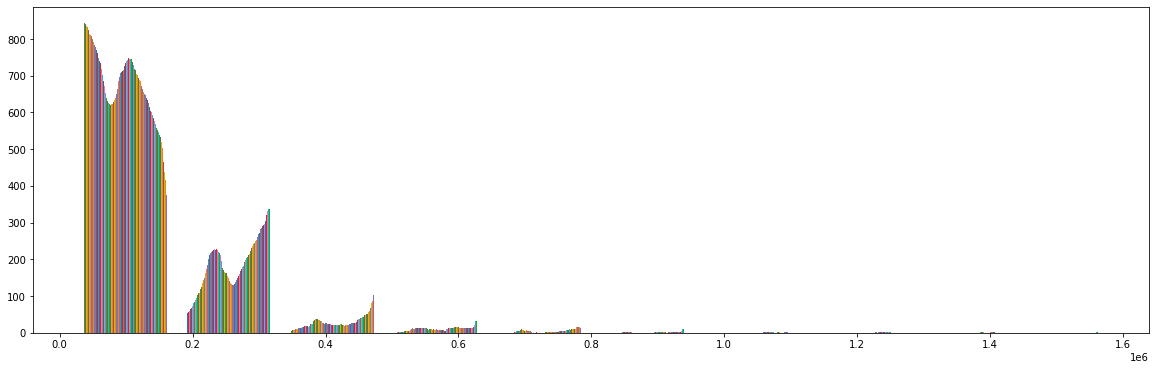

In [66]:
plt.hist(df_homes_lin1)

In this plot we can see that still the data is right skewed, proving that the null values are not filled properly.

In [67]:
# drop the rows from the df_homes that are added in the drop_list
df_uni_homes = df_homes_lin1.drop(drop_list)
# reset the index
df_uni_homes = df_uni_homes.reset_index()
# display the dataframe
df_uni_homes

index,index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,7,191888.000000,192133.000000,192510.000000,193310.000000,194422.000000,195645.000000,197168.000000,198813.000000,200458.000000,...,491985.0,499155.0,505892.0,510913.0,514500.0,516946.0,519809.0,522710.0,526104.000000,529871.0
1,13,143956.000000,144698.000000,145338.000000,146637.000000,147809.000000,149028.000000,150208.000000,151606.000000,152975.000000,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.000000,544220.0
2,23,178484.000000,179164.000000,179618.000000,180490.000000,180961.000000,181413.000000,181864.000000,182495.000000,182889.000000,...,482700.0,491743.0,501570.0,511881.0,520401.0,526624.0,530901.0,535500.0,540371.000000,547041.0
3,32,133439.000000,133621.000000,133879.000000,134351.000000,134848.000000,135313.000000,135843.000000,136481.000000,137093.000000,...,245474.0,249146.0,253056.0,257040.0,260152.0,262889.0,265705.0,268793.0,271983.000000,275240.0
4,35,181095.000000,181887.000000,182516.000000,183438.000000,184023.000000,184129.000000,184120.000000,184963.000000,185688.000000,...,431228.0,453042.0,476635.0,496521.0,512070.0,520051.0,526965.0,534255.0,545881.000000,558699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,880,147975.352965,148038.026139,148103.978723,148238.252354,148373.801311,148508.803700,148646.538931,148793.383635,148943.507749,...,173757.0,174647.0,175555.0,176544.0,177529.0,178447.0,179338.0,180189.0,182662.000000,184918.0
361,885,58733.150089,58846.494384,58965.769485,59208.603046,59453.743032,59697.894550,59946.988407,60212.556725,60484.055850,...,111481.0,112178.0,112792.0,113210.0,113571.0,114196.0,114639.0,115325.0,122575.971477,120718.0
362,893,83109.809091,83220.870909,83337.744102,83575.687591,83815.891058,84055.125963,84299.203681,84559.424104,84825.455901,...,132348.0,132672.0,133505.0,134102.0,134893.0,135835.0,136576.0,137154.0,138897.000000,140804.0
363,901,108089.298867,108286.719407,108494.470091,108917.432119,109344.411426,109769.669041,110203.535111,110666.096026,111138.987086,...,200884.0,202358.0,204580.0,206645.0,208726.0,210296.0,211478.0,212305.0,215363.000000,218641.0


In [68]:
df_non_uni_homes = df_homes_lin1.drop(df_uni_homes.index)
df_non_uni_homes

index,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
365,83134.000000,83448.000000,83694.000000,84262.000000,84681.000000,84967.000000,85104.000000,85251.000000,85451.000000,85647.000000,...,137082.0,139176.0,141622.0,144123.0,146721.0,149007.0,150552.0,152120.0,153183.000000,155040.0
366,92333.000000,92476.000000,92686.000000,92959.000000,93110.000000,93096.000000,93309.000000,93673.000000,94063.000000,94239.000000,...,188219.0,191628.0,195385.0,199562.0,203898.0,208198.0,212082.0,215418.0,221143.000000,227482.0
367,162883.000000,162780.000000,163020.000000,163748.000000,164713.000000,165619.000000,166259.000000,167017.000000,167638.000000,168234.000000,...,338467.0,343510.0,347453.0,350345.0,353067.0,356614.0,359894.0,363209.0,366247.000000,369211.0
368,65094.696545,65177.816445,65265.285643,65443.365197,65623.136144,65802.182208,65984.852687,66179.604547,66378.705703,66578.773371,...,103002.0,104849.0,107220.0,109655.0,111969.0,114058.0,116242.0,117597.0,120490.000000,123024.0
369,60160.000000,60208.000000,60302.000000,60467.000000,60685.000000,60933.000000,61228.000000,61489.000000,61628.000000,61778.000000,...,108192.0,110529.0,110842.0,111458.0,111868.0,112842.0,114573.0,116779.0,118818.000000,120219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,33643.431755,33756.463900,33875.410517,34117.575315,34362.040187,34605.519312,34853.927165,35118.764109,35389.515525,35661.581269,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.000000,93464.0
903,95216.000000,95562.000000,96148.000000,96843.000000,97562.000000,98104.000000,99203.000000,99880.000000,100014.000000,99595.000000,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.000000,252041.0
904,59081.738608,59271.048836,59470.264832,59875.850991,60285.289392,60693.076832,61109.119078,61552.677346,62006.141382,62461.806699,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.000000,170409.0
905,43480.606993,43560.055797,43643.661806,43813.876249,43985.707383,44156.845650,44331.448254,44517.598649,44707.906249,44899.137672,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,88231.300559,84231.0


In [69]:
uni_homes, non_uni_homes = price_ratio(list_2008_br, list_2008_rb)
ttest_lin_2008_1 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_lin_2008_1

Ttest_indResult(statistic=-0.775535865529845, pvalue=0.4382785537276208)

In [70]:
uni_homes, non_uni_homes = price_ratio(list_2019_br, list_2019_rb)
ttest_lin_2019_1 = ttest_ind(uni_homes, non_uni_homes, equal_var=False)
ttest_lin_2019_1

Ttest_indResult(statistic=-3.0552114039045426, pvalue=0.0023268330195869995)

In [73]:
list_2008 = []
list_2008.append(ttest_null_2008[1])
list_2008.append(ttest_mean_2008[1])
list_2008.append(ttest_KNN_2008[1])
list_2008.append(ttest_lin_2008[1])
list_2008.append(ttest_lin_2008_1[1])
list_2019 = []
list_2019.append(ttest_null_2019[1])
list_2019.append(ttest_mean_2019[1])
list_2019.append(ttest_KNN_2019[1])
list_2019.append(ttest_lin_2019[1])
list_2019.append(ttest_lin_2019_1[1])
comparison_df = pd.DataFrame({'2008': list_2008, '2019': list_2019, 'model': ["Null values", "Mean-SimpleImputer", "KNNImputer", "Linear Regression-1", "Linear Regression-2"]})

In [74]:
comparison_df.set_index('model')

,2008,2019
model,,
Null values,0.086188,0.034514
Mean-SimpleImputer,0.706498,0.001365
KNNImputer,0.917266,0.001253
Linear Regression-1,0.626582,0.021577
Linear Regression-2,0.438279,0.002327


# 5.0 Interpreting the results
T-Test: This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Null Hypothesis: It states that there is no effect or relationship between variables.
The alternative of it states that effect or relationship exists.

After performing a hypothesis test, there are two possible outcomes:

1. When p-value is lesser than or equal to significance level, you reject the null hypothesis. The data favoring the alternative hypothesis says your results are statistically significant.

2. When p-value is greater than your significance level, you fail to reject the null hypothesis. Your results are not significant.

# The above p-values of the ttest_ind results:

From the above table we can clearly infer that the null hypothesis can be rejected and the hypothesis mentioned is proven to be True for 2019, but for 2008 the result is null hypothesis cannot be rejected. (Significance level, alpha = 0.05).

We have performed different methods to fill the null values, as there were 4 members in the group each one worked on a different model to fill the null values and the last dataframe X shows the comparison of the ttest results which has given us better results with our models(Linear Regression 1 & 2) when compared to the in-built methods(SimpleImputer & KNNImputer).